In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.groupby("gender")["id"].value_counts()

gender  id  
F       16      1
        20      1
        100     1
        111     1
        118     1
               ..
M       2817    1
        2818    1
        2819    1
        2820    1
        2822    1
Name: id, Length: 2535, dtype: int64

In [5]:
kill.groupby("gender")["id"].unique()

gender
F    [16, 100, 20, 111, 118, 130, 163, 184, 189, 19...
M    [3, 4, 5, 8, 9, 11, 13, 15, 17, 19, 21, 22, 25...
Name: id, dtype: object

In [6]:
kill.groupby("gender")["id"].nunique()

gender
F     107
M    2428
Name: id, dtype: int64

In [7]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [8]:
kill.gender.value_counts().index

Index(['M', 'F'], dtype='object')

In [9]:
x = kill.gender.value_counts().index

In [10]:
y = kill.gender.value_counts()

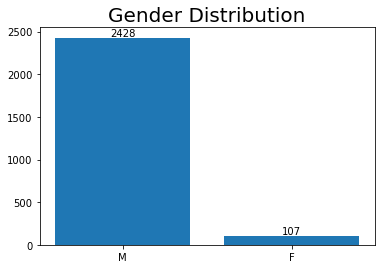

In [11]:

plt.bar(x, y)
plt.title("Gender Distribution", fontsize=20)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.show()

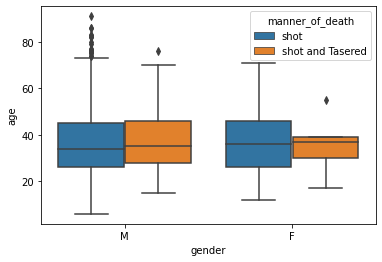

In [12]:
# Demonstrate the Qurtiles of age in both genders separeted by manner of death.
sns.boxplot(x="gender", y="age", hue = "manner_of_death", data=kill);


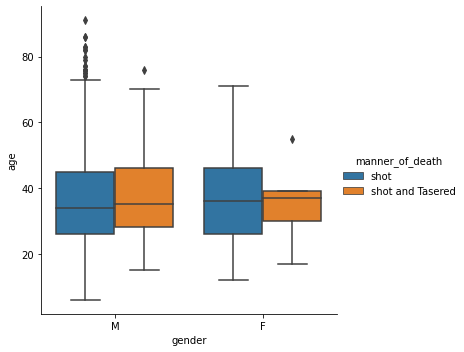

In [13]:
sns.catplot(x="gender", y="age", data=kill,kind='box',hue="manner_of_death");

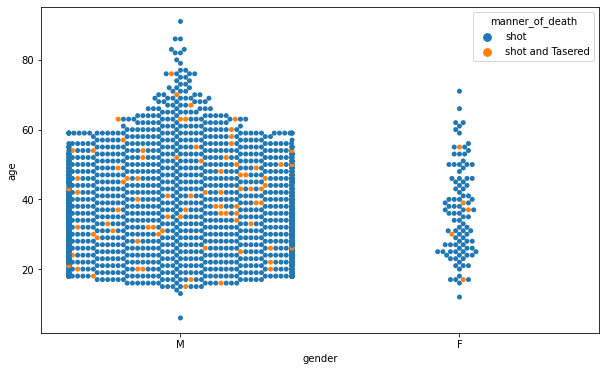

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="gender", y="age", hue = "manner_of_death", data=kill);

## 2: Plot 7 most common kill weapons

In [15]:
kill.armed.value_counts(dropna=False).head(7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [16]:
kill.armed.value_counts(dropna=False).head(7).index

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object')

In [36]:
x = kill.armed.value_counts(dropna=False).head(7).index
y = kill.armed.value_counts(dropna=False).head(7)

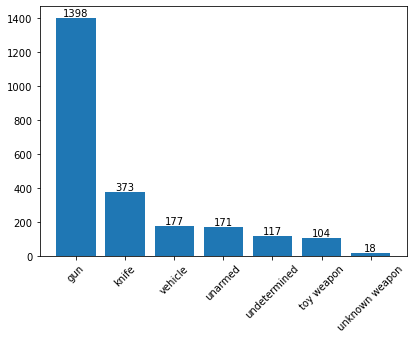

In [18]:
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

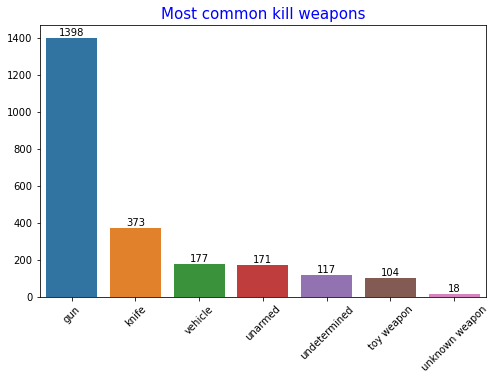

In [37]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x, y.values)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha="center", va="bottom")
ax.set_xticklabels(x, rotation = 45)
ax.set_title('Most common kill weapons',color = 'blue',fontsize=15);


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [22]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [23]:
kill.age.isnull().sum()

77

In [24]:
kill[kill.age > 25].count()

id                         1905
name                       1905
date                       1905
manner_of_death            1905
armed                      1897
age                        1905
gender                     1905
race                       1779
city                       1905
state                      1905
signs_of_mental_illness    1905
threat_level               1905
flee                       1861
body_camera                1905
dtype: int64

In [25]:
kill[kill.age <= 25].count()

id                         553
name                       553
date                       553
manner_of_death            553
armed                      553
age                        553
gender                     553
race                       532
city                       553
state                      553
signs_of_mental_illness    553
threat_level               553
flee                       536
body_camera                553
dtype: int64

In [26]:
kill["age_cat"] = np.nan
for row in range(len(kill)):
    if kill.age[row] > 25:
        kill["age_cat"][row] = "above25"
    else:
        kill["age_cat"][row] = "below25"

In [27]:
kill.age_cat.value_counts()


above25    1905
below25     630
Name: age_cat, dtype: int64

In [28]:
kill.age_cat.value_counts().index

Index(['above25', 'below25'], dtype='object')

In [29]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [30]:
x = kill.age_cat.value_counts().index
y = kill.age_cat.value_counts()

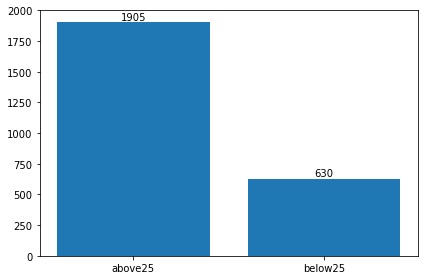

In [31]:
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.tight_layout()

plt.show()

## 4: Plot number of killed people by race

In [32]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [33]:
x = kill.race.value_counts().index
y = kill.race.value_counts()

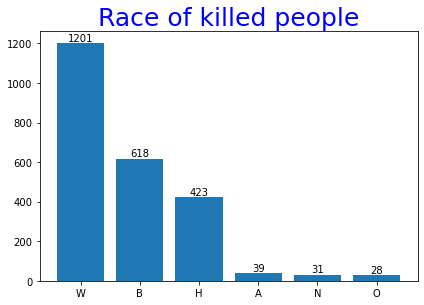

In [34]:
plt.bar(x, y)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha="center", va="bottom")

plt.tight_layout()
plt.title("Race of killed people", fontsize=25, color="blue")
plt.show()

## 5: Killed People According to Races (Pie Chart)

In [38]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [39]:
kill.race.value_counts(dropna=False).index

Index(['W', 'B', 'H', nan, 'A', 'N', 'O'], dtype='object')

In [40]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [41]:
# EXTRAS

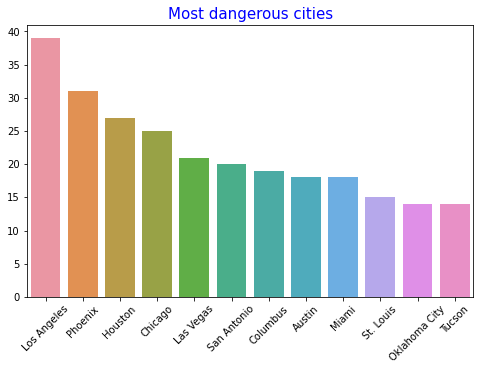

In [43]:
# Most dangerous cities
city_freq = kill.city.value_counts()[:12]

fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=city_freq.index, y=city_freq.values)
ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

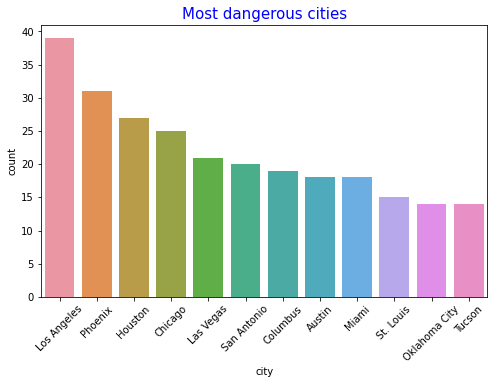

In [48]:
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="city", data=kill,
             order=city_freq.index,
             )
ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

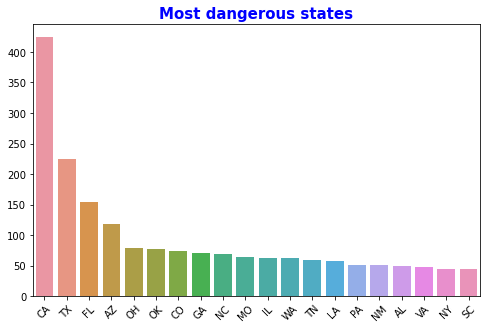

In [50]:
state_freq = kill.state.value_counts()[:20]
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=state_freq.index, y=state_freq.values)
ax.set_xticklabels(state_freq.index, rotation = 45)
ax.set_title('Most dangerous states',color = 'blue',fontsize=15,fontweight='bold');

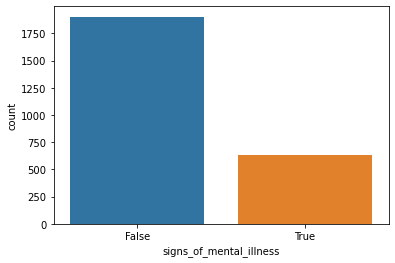

In [51]:
illness = kill.signs_of_mental_illness.value_counts()
sns.countplot(kill.signs_of_mental_illness);

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [52]:
kill.dropna(inplace=True)

In [53]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [54]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [55]:
kill.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [56]:
kill.race.value_counts().values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

In [57]:
labels = kill.race.value_counts().index
values = kill.race.value_counts().values

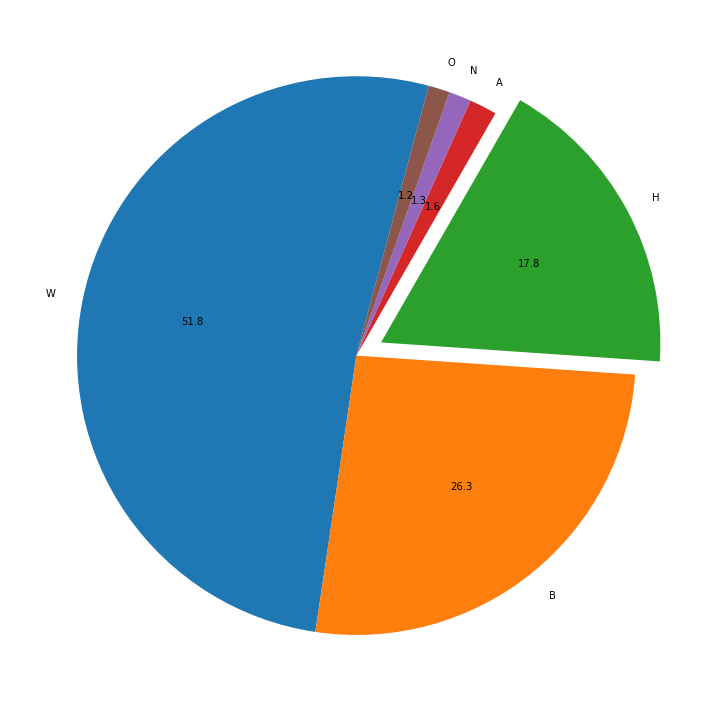

In [58]:
plt.figure(figsize=(15, 10))
plt.pie(values, labels = labels, startangle=75, autopct="%.1f", explode=[0,0,0.1,0,0,0])
plt.tight_layout()
plt.show()